In [1]:
from skimage import io
import matplotlib.pyplot as plt
import numpy as np

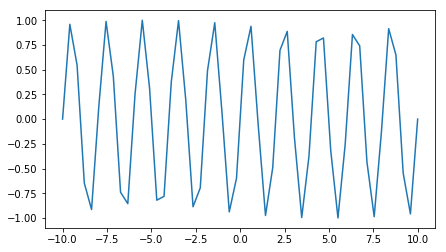

In [2]:
f = 1/2
n_samples = 50

x = np.linspace(-10, 10, n_samples)
y = np.sin(x * f * (2 * np.pi))

# Plot
plt.figure(figsize=(7, 4))
plt.plot(x, y)

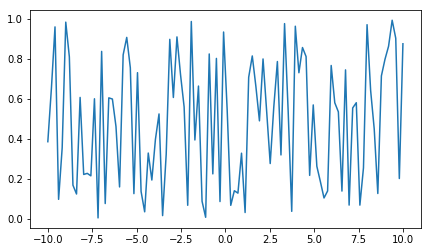

In [3]:
n_samples = 100
x = np.linspace(-10, 10, n_samples)
y = np.random.random(n_samples)
plt.figure(figsize=(7, 4))
plt.plot(x, y)

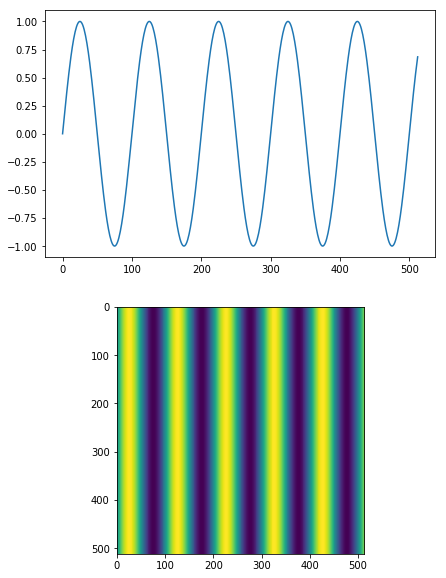

In [4]:
f = 1/100
image_size = 512
x = np.linspace(0, image_size, image_size)
wave = np.sin(x * f * 2 * np.pi)
# Using newaxis rotates the array.
image = np.ones(image_size)[:, np.newaxis] * wave[np.newaxis, :]
# Plot a different way using subplots.  "ax" or axes are the "panels", not the plot axes.
fig, ax = plt.subplots(2, figsize=(7, 10))
ax[0].plot(x, wave)
ax[1].imshow(image)
# Shows how the wave is projected along the image axis.

In [5]:
# Illustration of np.newaxis.
np.ones([3])[:, np.newaxis]

array([[1.],
       [1.],
       [1.]])

# Challenges

Create a 1D signal (1000 samples) from -10 to 10 seconds that is the combination of three sine waves (f = 1/9, 1/2, and 1) and plot the result.

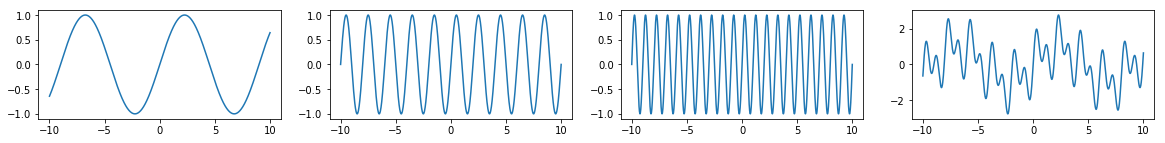

In [6]:
fs = np.array([1/9, 1/2, 1])
x = np.linspace(-10, 10, 1000)
ys = [np.sin(x * f * 2 * np.pi) for f in fs]
y = np.sum(ys, axis=0)
fig, ax = plt.subplots(ncols=4, figsize=(20, 2))
for i in range(3):
    ax[i].plot(x, ys[i])
ax[3].plot(x, y)

Plot the same signal with a sample rate equal to 1.

Hint: `sample_rate = (n_samples - 1) / n_seconds`

n_samples: 21


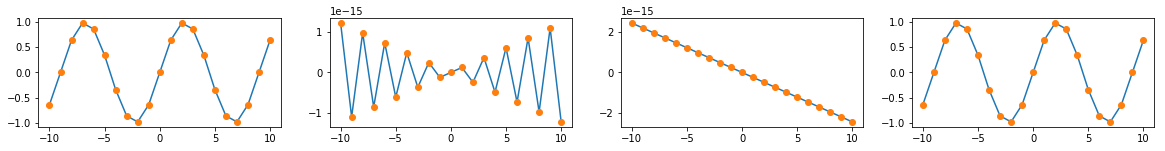

In [7]:
sample_rate = 1
n_seconds = 20
# 1 sample per second from -10 to 10.
n_samples = sample_rate * n_seconds + 1
print('n_samples:', n_samples)
x = np.linspace(-10, 10, n_samples)
ys = [np.sin(x * f * 2 * np.pi) for f in fs]
y = np.sum(ys, axis=0)
fig, ax = plt.subplots(ncols=4, figsize=(20, 2))
for i in range(3):
    ax[i].plot(x, ys[i])
    ax[i].plot(x, ys[i], 'o')
ax[3].plot(x, y)
ax[3].plot(x, y, 'o')

Now rerun the code for Challenge 2 (copy and paste into a new cell), but combine only the two lower frequency sine waves for your starting signal. How do the plots for 2 and 3 compare?

n_samples: 21


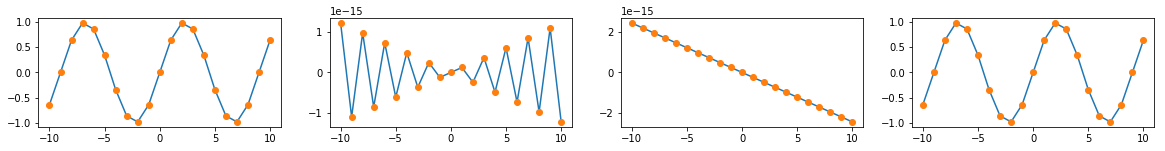

In [8]:
sample_rate = 1
n_seconds = 20
# 1 sample per second from -10 to 10.
n_samples = sample_rate * n_seconds + 1
print('n_samples:', n_samples)
x = np.linspace(-10, 10, n_samples)
ys = [np.sin(x * f * 2 * np.pi) for f in fs]
y = np.sum(ys[:-1], axis=0)
fig, ax = plt.subplots(ncols=4, figsize=(20, 2))
for i in range(3):
    ax[i].plot(x, ys[i])
    ax[i].plot(x, ys[i], 'o')
ax[3].plot(x, y)
ax[3].plot(x, y, 'o')

What happens if you apply a Gaussian filter to the image above after downsampling? Try a range of sigma values. How does this compare to the image in which you filtered prior to downsampling?

/home/omsai/.local/lib/python3.7/site-packages/skimage/transform/_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/home/omsai/.local/lib/python3.7/site-packages/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


Zooming into image[0]: (920, 1167, 4) -> (920, 1167, 4)
Zooming into image[1]: (138, 175, 4) -> (30, 30, 4)
Zooming into image[2]: (138, 175, 4) -> (30, 30, 4)
Zooming into image[3]: (920, 1167, 4) -> (920, 1167, 4)
Zooming into image[4]: (138, 175, 4) -> (30, 30, 4)
Zooming into image[5]: (920, 1167, 4) -> (920, 1167, 4)


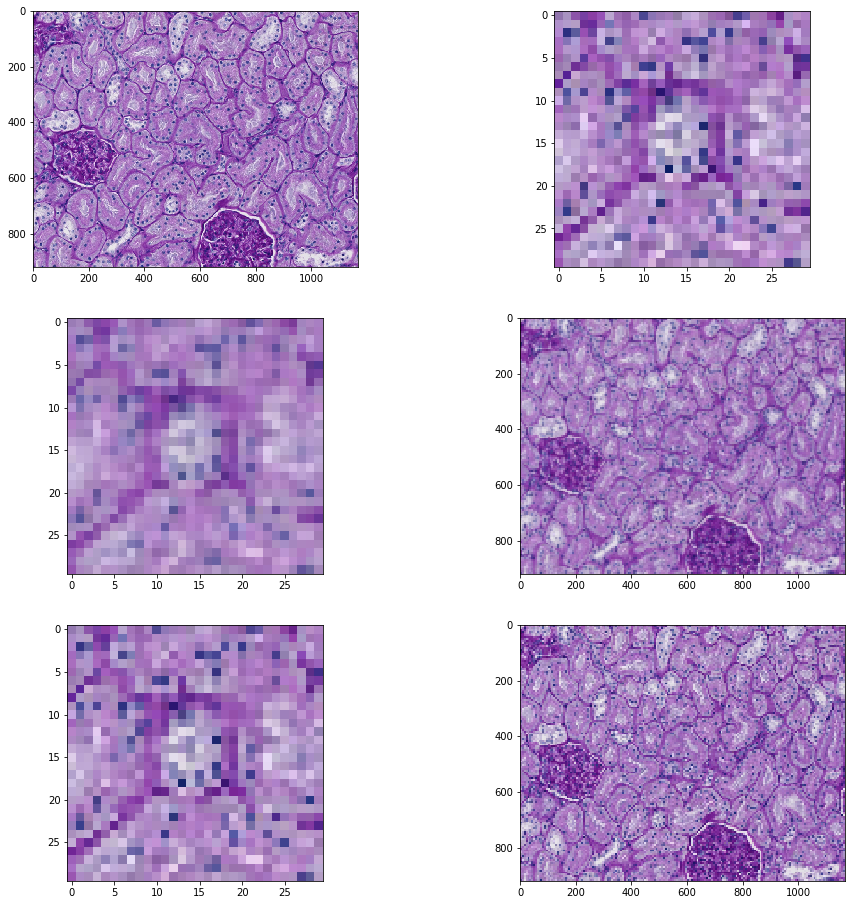

In [9]:
from skimage.transform import rescale
from skimage.filters import gaussian

downsample_factor = .15
upsample_factor = 1 / downsample_factor
manual_sigma = 0.5
image = []
image.append(io.imread('../data/bear_kidney.png'))
# Filter after downsampling.
image.append(rescale(image[0], downsample_factor, order=0, anti_aliasing=False, multichannel=True))
image.append(gaussian(image[1], manual_sigma, multichannel=True))
image.append(rescale(image[2], upsample_factor, order=0, multichannel=True))
# Filter before downsampling.
image.append(rescale(gaussian(image[0], manual_sigma, multichannel=True),
                     downsample_factor, order=0, anti_aliasing=False, multichannel=True))
image.append(rescale(image[4], upsample_factor, order=0, multichannel=True))
fig, ax = plt.subplots(3, 2, figsize=(16, 16), sharey=False)
rows = np.array([600, 800])
cols = np.array([400, 600])
zoom_large = [slice(*rows.tolist()),
              slice(*cols.tolist())]
zoom_small = [slice(*(rows * downsample_factor).astype('int').tolist()),
              slice(*(cols * downsample_factor).astype('int').tolist())]
for i in range(len(image)):
    if i in [1, 2, 4]: # Scaled.
        im = image[i][zoom_small[0], zoom_small[1]]
        print(f'Zooming into image[{i}]:', image[i].shape, '->', im.shape)
        ax[int(i / 2), i % 2].imshow(im)
    else:
        im = image[i]
        print(f'Zooming into image[{i}]:', image[i].shape, '->', im.shape)
        ax[int(i / 2), i % 2].imshow(im)